<a href="https://colab.research.google.com/github/BAlshowaikh/ML-Projects/blob/main/Neural_Network_Regression_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network regression
These are lectures 42 - 61 of the course

In [ ]:
import tensorflow as tf

# Create some data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # This library to create a 2d graphs, matplotlib is a library that creates interactive visualizations using python scripts


In [ ]:
# Create features, mostly refer to X
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Create lables, mostly refer to y
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])

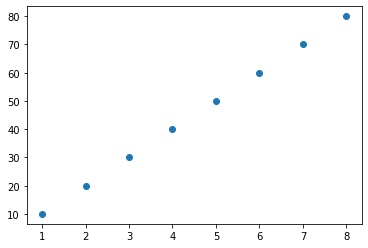

In [ ]:
# Visualize the X and y
plt.scatter(X, y);

In [ ]:
# What is the relationship between X and y??
y == X + 10

array([False, False, False, False, False, False, False, False])

In [ ]:
# Check the shape of the first position of X and y
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape
# The output is weird that's because it's scaler (0 ndim), so we have to turn it to a tenso

((), ())

In [ ]:
# Turn our NumPy array to a tensor
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([10., 20., 30., 40., 50., 60., 70., 80.], dtype=float32)>)

# Stepes in modelling in TensorFlow to find the relationship between features and lables

1. **Creating a model** - define the input and output layers of a deep learning model. There are functions such as **activation** and **verbose** (how you want to see the output of your Nural Network while it's training. You have 0, 1 or 2)
2. **Compiling a model** - define a **loss function** (This will tell our model how much wrong it is) and the **optimizer** (Tells our model how to improve the patterns it's learning) and **evaluation metrics **(What we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between our X & y (Features and lables)

In [ ]:
# Set random seed to better dealing with tensors
tf.random.set_seed(42)

### 1. Create a model using the Sequential API

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Set one because in our case we want our model to take one input and predict one output
])

### 2.Compile the model


In [ ]:
model.compile(loss=tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
              metrics = ["mae"]) #For short, you can use a lot of function as a string

### 3.Fit the model

In [ ]:
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) #epochs means that you have 5 opportunities to go through the features and lables and figure out the patterns between them

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 42.4347 - mae: 42.4347
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 42.2222 - mae: 42.2222
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 42.0097 - mae: 42.0097
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 41.7972 - mae: 41.7972
Epoch 5/5
1/1 [==============================] - 0s 22ms/step - loss: 41.5847 - mae: 41.5847


In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([10., 20., 30., 40., 50., 60., 70., 80.], dtype=float32)>)

### Make our model predict the value of y based on what it learned


In [ ]:
model.predict([9.]) # The ACTUAL VALUE SHOULD BE 90

1/1 [==============================] - 0s 153ms/step


array([[7.20554]], dtype=float32)

### Ways to improve our model

#### We can improve our model by altering the stepes we took to create it

1. ***Creating a model*** - we can add **more layers**, increase the number of **hidden units** (called neurons) within each individual hidden layers, or **change the activation function** of each layer.
2. ***Compiling a model*** - we might **change the optimization function** or the **learning rate** of the optimization function.
3. ***Fitting the model*** - we can fit the model for **more epochs** (Let it train for longer) or we might **increase the amount of data** that the model learn from.

In [ ]:
# Let's start with adding more epochs

#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
           optimizer=tf.keras.optimizers.SGD(),
           metrics="mae")

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 626ms/step - loss: 42.0711 - mae: 42.0711
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 41.8586 - mae: 41.8586
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 41.6461 - mae: 41.6461
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 41.4336 - mae: 41.4336
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 41.2211 - mae: 41.2211
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 41.0086 - mae: 41.0086
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 40.7961 - mae: 40.7961
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 40.5836 - mae: 40.5836
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 40.3711 - mae: 40.3711
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 40.1586 - mae: 40.1586
Epoch 11/100
1/1 [==============================

In [ ]:
# Check the model's prediction again
model.predict([9.])

1/1 [==============================] - 0s 148ms/step


array([[47.35791]], dtype=float32)

In [ ]:
# Let's try to change the optimizer

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

#3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 850ms/step - loss: 41.2374 - mae: 41.2374
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 41.1824 - mae: 41.1824
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 41.1274 - mae: 41.1274
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 41.0724 - mae: 41.0724
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 41.0174 - mae: 41.0174
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 40.9624 - mae: 40.9624
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 40.9074 - mae: 40.9074
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 40.8525 - mae: 40.8525
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 40.7974 - mae: 40.7974
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 40.7424 - mae: 40.7424
Epoch 11/100
1/1 [==============================] - 

In [ ]:
model.predict([9.])

1/1 [==============================] - 0s 240ms/step


array([[17.525095]], dtype=float32)

In [ ]:
# Let's try to add more hidden layers with 100 hidden units

# 1.Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

#3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 631ms/step - loss: 45.2255 - mae: 45.2255
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 44.4666 - mae: 44.4666
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 43.7064 - mae: 43.7064
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 42.9386 - mae: 42.9386
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 42.1568 - mae: 42.1568
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 41.3544 - mae: 41.3544
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 40.5248 - mae: 40.5248
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 39.6612 - mae: 39.6612
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 38.7565 - mae: 38.7565
Epoch 10/100
1/1 [==============================] - 0s 54ms/step - loss: 37.8032 - mae: 37.8032
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Prediction
model.predict([9.])

1/1 [==============================] - 0s 257ms/step


array([[89.55405]], dtype=float32)

# Evaluate the model

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make lables for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

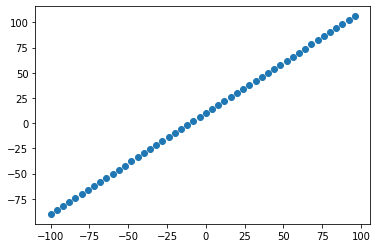

In [ ]:
# Visualize the data
plt.scatter(X, y)

### Work with 3 sets in ML

1. **Training set** - this model learns from this data, which is typically 70-80% of the model dataset.
2. **Validation set** - the model gets tuned on this data, which is typically 10-15% of the model dataset.
3. **Test set** - the model gets evaluated on this data to test what it has learned, which is typically 10-15% of the model dataset.

### 1.Split the data into train and test sets

In [ ]:
X_train = X[:40] # The first 40 numbers
y_train = y[:40] #The first 40 numbers

X_test = X[40:] #The last 10 numbers
y_test = y[40:] #The last 10 numbers

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### 2.Visualizing the data

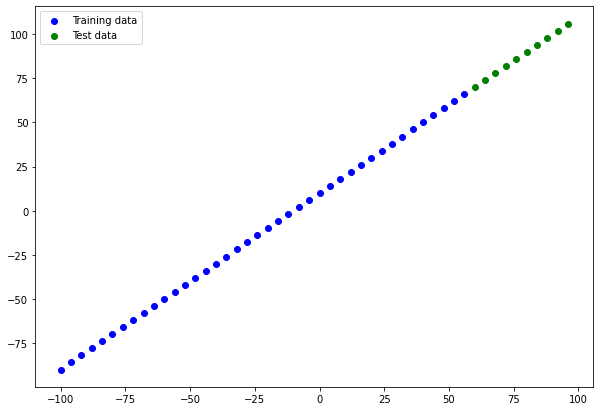

In [ ]:
plt.figure(figsize=(10, 7))

# Plot training data in blue colour
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green colour
plt.scatter(X_test, y_test, c="g", label="Test data")

plt.legend()

### Craete a model for our training data

In [ ]:
# Set a seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")


#### Before fitting the model we want to get a summary

In [ ]:
model.summary() # This error beacuse we must set an input_shape

ValueError: ignored

In [ ]:
# Fixing the error above by setting an input shape

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layers"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
], name="Batoola")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics="mae")


In [ ]:
model.summary()

Model: "Batoola"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


#### Catching information from the above summary

* **Total params** - total number of parameters in the model
* **Trainable params** - parameters the model can update as it training
* **Non-trainable params** - parameters aren't updated during training

In [ ]:
# 3.Fit our model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=1)


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.6201 - mae: 27.6201
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.0802 - mae: 25.0802
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 22.3544 - mae: 22.3544
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 19.3160 - mae: 19.3160
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 16.0700 - mae: 16.0700
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6259 - mae: 12.6259
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4291 - mae: 9.4291
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1307 - mae: 8.1307
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0751 - mae: 9.0751
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4771 - mae: 9.4771
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

### Visualize the model using plot_model

In [ ]:
from tensorflow.keras.utils import plot_model

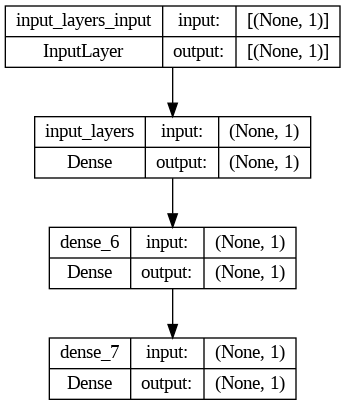

In [ ]:
plot_model(model=model, show_shapes=True)

### Visualize the predictions of our model

In [ ]:
# See the predictions of our model
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 65ms/step


array([[ 70.737885],
       [ 74.780266],
       [ 78.822655],
       [ 82.86503 ],
       [ 86.90741 ],
       [ 90.94979 ],
       [ 94.99217 ],
       [ 99.03455 ],
       [103.07694 ],
       [107.11932 ]], dtype=float32)

In [ ]:
# Compare the prediction and the ground truth ( The actual values )
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# For a better understanding, lets make the a plot for the predictions

def plot_predictions(train_data=X_train,
                train_lables=y_train,
                test_data=X_test,
                test_lables=y_test,
                prediction=y_pred):
   # Create a figure
   plt.figure(figsize=(10, 7))
   # plot training data in blue
   plt.scatter(train_data, train_lables, c='b', label="training data")
   # plot testing data in green
   plt.scatter(test_data, test_lables, c='g', label="testing data")
   # plot model's predictions in red
   plt.scatter(test_data, y_pred, c='r', label="prediction")
   # Show a legend
   plt.legend()

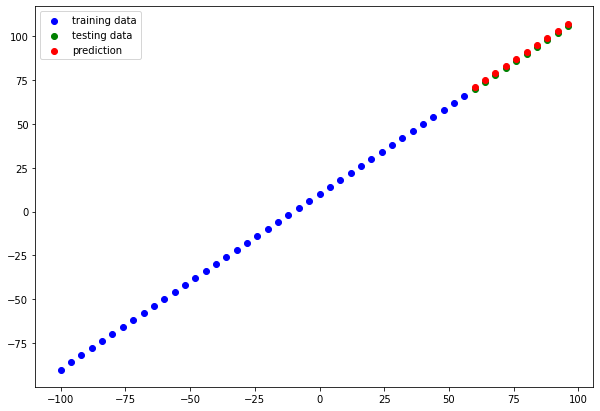

In [ ]:
plot_predictions()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 166ms/step - loss: 0.9286 - mae: 0.9286


[0.9286025762557983, 0.9286025762557983]

### How to calculate the mean absolute error (mae) & mean square error (mse)

#### Important notes to take care of when calculating the mae & mse
* 1. It's vital that your data are in the form of a tensor
* 2. Don't forget to compare the shapes of the tensors that you want to calculate the mae or mse from ( Should be in the same shape)


In [ ]:
# Our goal is to calculate the same output as in model.evaluate (mae=0.3721)

# Try the function of mae
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.409693 , 14.3318405, 12.070938 , 10.626994 , 10.       ,
       10.189959 , 11.196869 , 13.020732 , 15.661554 , 19.119324 ],
      dtype=float32)>

In [ ]:
# Let's apply the notes above
# 1- Are both of them (y_test & y_pred) tensors? Ans. No
y_pred, y_test
# Solution convert y_pred to tensor
tf.constant(y_pred)
# 2- Are both of them in the same shape? Ans.No
tf.constant(y_pred).shape, y_test.shape
# Solution: Use the tf.squeez
tf.squeeze(y_pred).shape

TensorShape([10])

In [ ]:
# Calculate after the adjustments
mae = tf.metrics.mean_absolute_error(y_pred=tf.squeeze(y_pred),
                                     y_true=y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.9286026>

In [ ]:
# Calculate mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.87712157>

In [ ]:
# Make doem functions for our MAE & MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_test):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))

# Running experiments to improve our model's performance

### Improve our model by
1. Gert more data - get more examples for your model to train on (more opportinities to learn patterns between features and lables)
2. Make your model larger - this might come in the form of more layers or more hidden unites in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modellig experimentes:
1. `model_1` - same as the original, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

* 1 layer, trained for 100 epochs.

In [ ]:
# Set a random see
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

**Plot our `model_1` predictions**

1/1 [==============================] - 0s 52ms/step


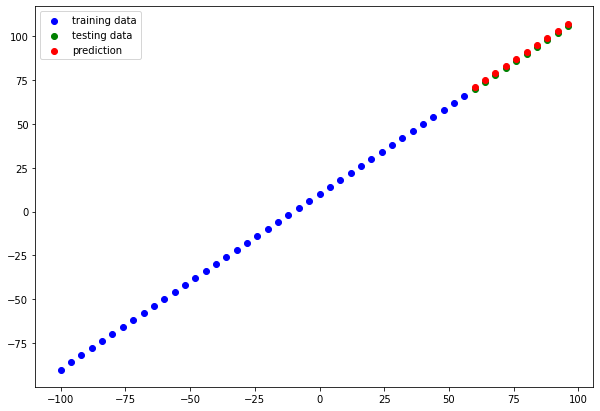

In [ ]:
# Make predictions
y_pred_1 = model_1.predict(X_test)
#Plot the predictions using the function we created earlire (plot_predictions)
plot_predictions(prediction=y_pred_1)

**Evaluate our `model_1` metrics MAE & MSE**

In [ ]:
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=389.6244>)

**Build `model_2`**

* 2 hidden layers, trained for 100 epochs

In [ ]:
# Set a randeom seed
tf.random.set_seed(42)

# 1.Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse")

# 3.Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

**Plot our `model_2` predictions**

1/1 [==============================] - 0s 133ms/step


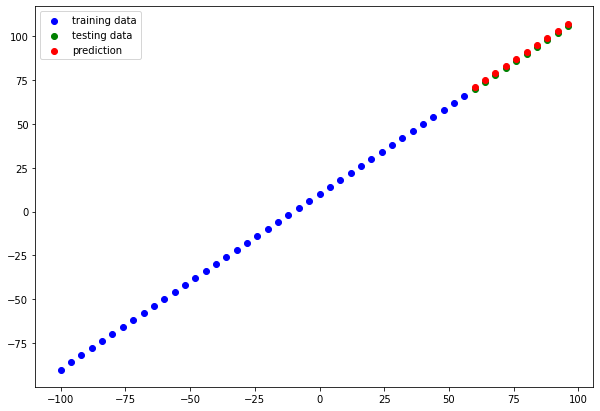

In [ ]:
# Make a prediction
y_pred_2 = model_2.predict(X_test)

# Plot the predictions
plot_predictions(prediction=y_pred_2)

**Evaluate `model_2` metrics MAE & MSE**

In [ ]:
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.5988793>)

**Build `model_3`**

* 2 hidden layers, trained for 500 epochs

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

# 3.Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 23ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 18ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 17ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 18ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 17ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================]

**Plot out `model_3` predictions**

1/1 [==============================] - 0s 83ms/step


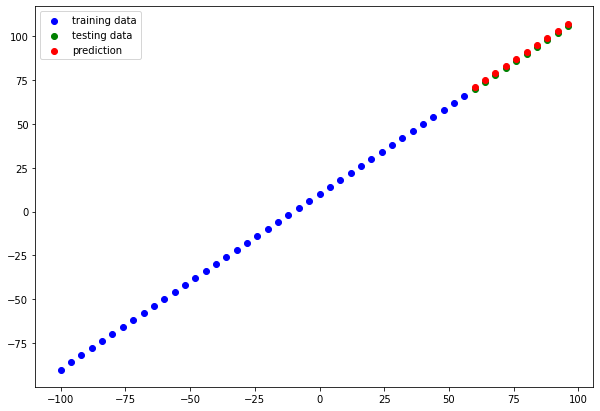

In [ ]:
# Make a prediction
y_pred_3 = model_3.predict(X_test)

# Plot the predictions
plot_predictions(prediction=y_pred_3)

**Evaluate our `model_3` metrics MAE & MSE**

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, tf.squeeze(y_pred_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4938.7837>)

# Comparing the results of our model

### Using pandas DataFrame

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,389.624390
1,model_2,3.196940,7.598879
2,model_3,68.713615,4938.783691


### Other ways to tracking the models' results

#### There are other ways to compare the results such as:
* **TensorBoard** - A component of the tensorflow library to help tracking model's experiment (Go through that later)
* **Weights & Biases** - A tool to track all kinds of ML experiment (Plugs straight to TensorBoard)

# Save the models

This allows us to use our model outside Google Colab ( or wherever the were trained) such as web applications or mobile apps.

### Save the model using SaveModel format

In [ ]:
model_2.save("My_model_SaveModel_format")

### Save the model using HDF5 Format

In [ ]:
model_2.save("My_model.h5")

# Load a saved model

### Laod a SaveModel format model

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("My_model_SaveModel_format")

In [ ]:
# Compare model_2 predictions and SaveModel predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SaveModel_preds

1/1 [==============================] - 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###Load a HDF5 format model

In [ ]:
loaded_h5_format = tf.keras.models.load_model("My_model.h5")

In [ ]:
# Comapre model_2 predictions and HDF5 format predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded_h5_format.predict(X_test)

model_2_preds == loaded_h5_preds

1/1 [==============================] - 0s 113ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Load a model (Or any file) from Google Colab

### There are different ways to download a file form Google Colab:
1. Go to 'file' tab and right click the file you wish to download and then click 'download'.
2. Use the code below
3. Saving it to Google Drive by connecting Google Drive and copying it (See the second cell code)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/My_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file to Google Drive
# !cp (The file's path) (The 'My Drive path')